# Марковская цепь

In [191]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [192]:
with open('/Netology/Временные ряды/Лекция6/tom_1.txt', 'rb') as f:
    text = f.read().decode('UTF8').lower()
text1 = re.sub('[^а-яё ]','', text)
with open('/Netology/Временные ряды/Лекция6/tom_2.txt', 'rb') as f:
    text = f.read().decode('UTF8').lower()
text2 = re.sub('[^а-яё ]','', text)
with open('/Netology/Временные ряды/Лекция6/tom_3.txt', 'rb') as f:
    text = f.read().decode('UTF8').lower()
text3 = re.sub('[^а-яё ]','', text)
with open('/Netology/Временные ряды/Лекция6/tom_4.txt', 'rb') as f:
    text = f.read().decode('UTF8').lower()
text4 = re.sub('[^а-яё ]','', text)
text=text1+text2+text3+text4

In [193]:
len(text)

2764441

In [194]:
RUS = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUS)}

In [195]:
probabilities = np.zeros((len(RUS), len(RUS)))

In [196]:
for cp, cn in zip(text[:-1], text[1:]):
#     print(cp,cn)
    probabilities[POS[cp], POS[cn]] += 1

In [197]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [198]:
df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))

In [199]:
df

,а,б,в,г,д,е,ё,ж,з,и,...,ч,ш,щ,ъ,ы,ь,э,ю,я,
а,0.000196,0.008748,0.047077,0.012012,0.027278,0.013674,0.000000,0.016752,0.056727,0.001858,...,0.010690,0.018371,0.003376,0.000000,0.000000,0.000000,0.000042,0.010887,0.034136,0.237949
б,0.065245,0.000600,0.005402,0.000675,0.001525,0.141918,0.000025,0.000450,0.000050,0.048690,...,0.001375,0.000300,0.013454,0.006777,0.272507,0.002501,0.000025,0.000275,0.029309,0.014904
в,0.138951,0.000432,0.001043,0.000977,0.007827,0.111638,0.000009,0.000028,0.012524,0.078979,...,0.001015,0.030019,0.000103,0.000338,0.063768,0.004134,0.000009,0.000019,0.005186,0.163295
г,0.056217,0.000000,0.002363,0.000066,0.062355,0.030714,0.000000,0.000066,0.000088,0.043013,...,0.001634,0.000420,0.000000,0.000000,0.000066,0.000110,0.000000,0.000199,0.000066,0.046744
д,0.165234,0.001248,0.037191,0.000298,0.001050,0.170894,0.000028,0.000539,0.000099,0.095730,...,0.001248,0.004695,0.000014,0.006553,0.023404,0.015262,0.000028,0.001645,0.016156,0.041844
е,0.000480,0.016026,0.021478,0.049143,0.037187,0.023199,0.000011,0.014965,0.017224,0.002718,...,0.013455,0.009602,0.008641,0.000000,0.000000,0.000000,0.000021,0.003838,0.005078,0.239995
ё,0.000000,0.000000,0.001970,0.002956,0.001970,0.000000,0.000000,0.001970,0.001970,0.000000,...,0.000000,0.001970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.920197
ж,0.149059,0.005917,0.000000,0.001469,0.081405,0.410577,0.000000,0.002081,0.000000,0.151140,...,0.004448,0.000000,0.000000,0.000000,0.000000,0.004489,0.000041,0.003142,0.000000,0.021912
з,0.357291,0.011746,0.053735,0.026740,0.045794,0.016059,0.000000,0.010909,0.004973,0.023620,...,0.001066,0.000685,0.000000,0.001066,0.038030,0.040669,0.000000,0.004592,0.031764,0.087097
и,0.001461,0.007315,0.043226,0.008590,0.026750,0.046781,0.000000,0.006764,0.033816,0.014355,...,0.021504,0.006015,0.002447,0.000000,0.000000,0.000006,0.000051,0.006028,0.031862,0.331151


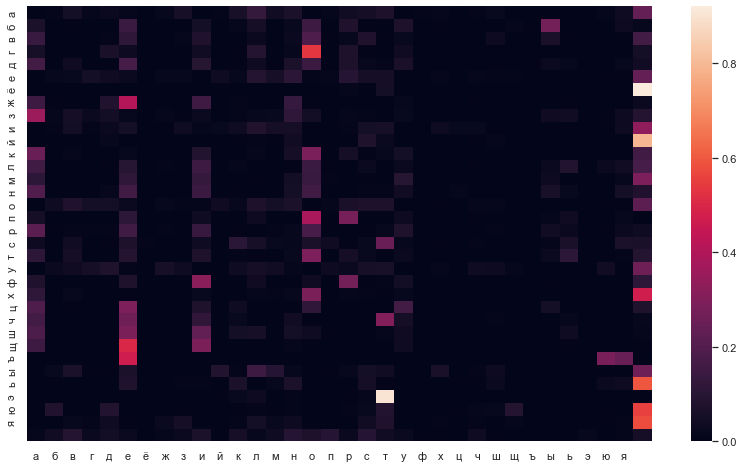

In [200]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

Посчитаем вероятность встретить строку из 4-х символов, которая начинается с п, а кончается на р; 

In [202]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUS)
count = 0
result =0
for i in RUS[1:]:
    for j in RUS[1:]:
        proba = prior * probabilities[start, POS[i]] * probabilities[POS[i], POS[j]] * probabilities[POS[j], end]
        if proba > 0:
            result += proba
            count +=1
#             print(''.join(['п', i, j, 'р']), proba) - вывести получившиеся слова 
print('Всего слов:', count, 'Вероятность :', result)

Всего слов: 613 Вероятность : 0.0008262769765051727


### Генерирование выборок из марковской цепи

Как создать реализацию длины $N$ из марковской цепи?
Сгенерировать начальное состояние согласно распределению $\alpha_i≡P(X_0=i)$, положить $n \leftarrow 0$.
Пока $n<N$, повторять:
- Имея контекст $X_n$, сгенерировать состояние $X_{n+1}$ из распределения $P(X_{n+1}|X_n)$
- Положить $n \leftarrow n+1$

Cгенерируем слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [203]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUS), p=probabilities[index])
    s.append(next_char)
    
print (''.join(s))

быко ирел


### Прогноз с использованием HMM

In [204]:
!pip install hmmlearn

In [205]:
series = pd.read_csv("/Netology/Временные ряды/Лекция1/Series/daily-total-female-births-in-cal.csv")["Count"]

In [206]:
values = series.values.reshape(-1,1)

In [207]:
from hmmlearn.hmm import GaussianHMM

Определим оптимальное количество состояний

In [208]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

C:\Users\vagin\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


1 -1245.3909354932182
2 -1231.3878946963632
3 -1229.8817783142417
4 -1226.302778123492
5 -1218.8880147612497
6 -1212.4010618594157
7 -1200.8136609567146
8 -1200.0902321540323
9 -1195.6070070740552
10 -1191.4054096268083
11 -1144.6856106190119
12 -1180.3687370562939
13 -1171.4481201848887


Возьмем 10 состояний модели

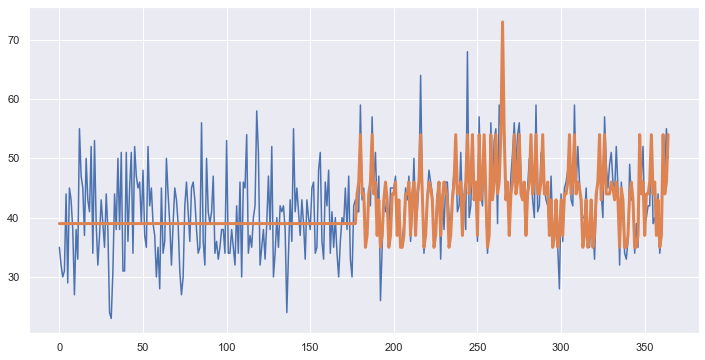

In [189]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

Сделаем прогноз по среднему значению ряда на 5 шагов 

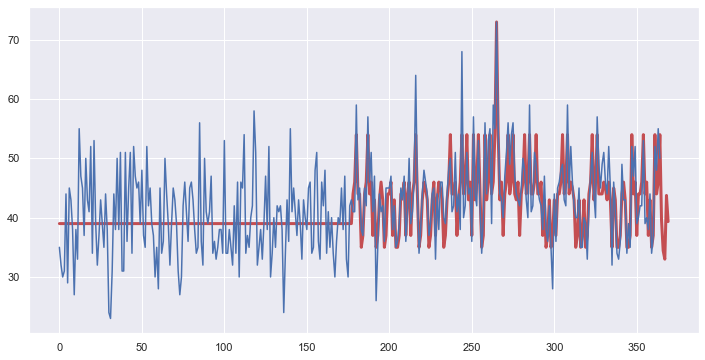

In [209]:
n = 5 
prognos = means
last_label = labels[-1]
for i in range(n):
  last_label = np.random.choice(list(range(model.n_components)), p=model.transmat_[last_label])
  prognos = np.concatenate((prognos, model.means_[last_label].reshape(-1,1)))

plt.figure(figsize=(12, 6))
plt.plot(prognos, linewidth=3, c='r')
plt.plot(values)